<a href="https://colab.research.google.com/github/dakshoza/Student-performance-predicter-model/blob/main/Student_performance_predicter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [134]:
df = pd.read_csv('/content/Student_Performance.csv')

In [135]:
df

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


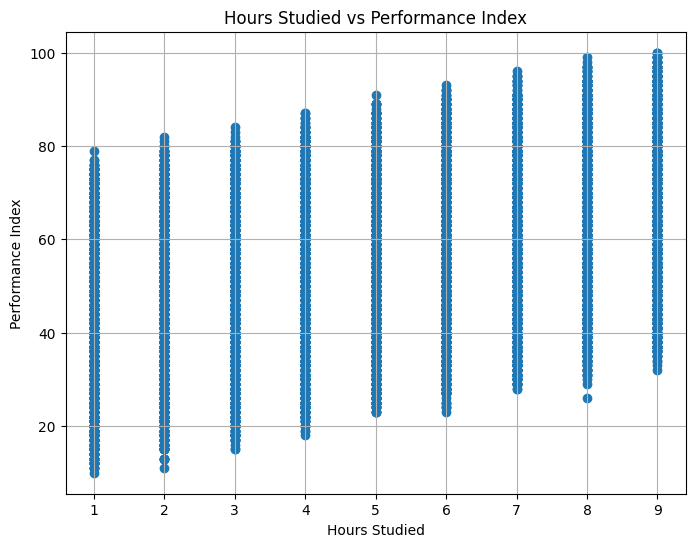

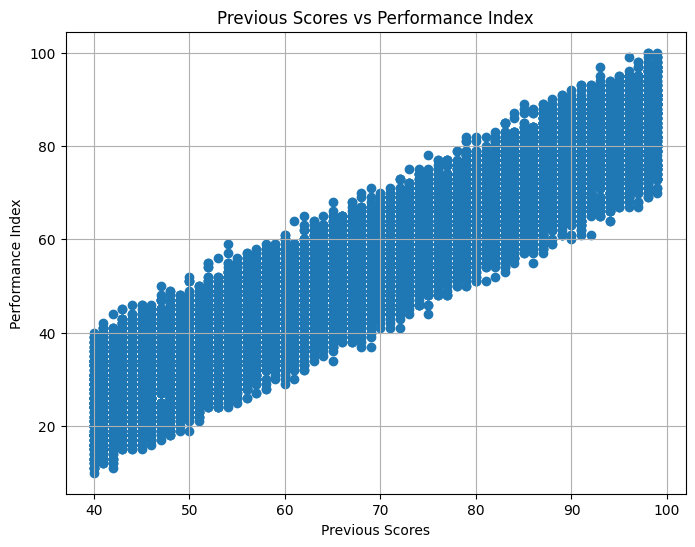

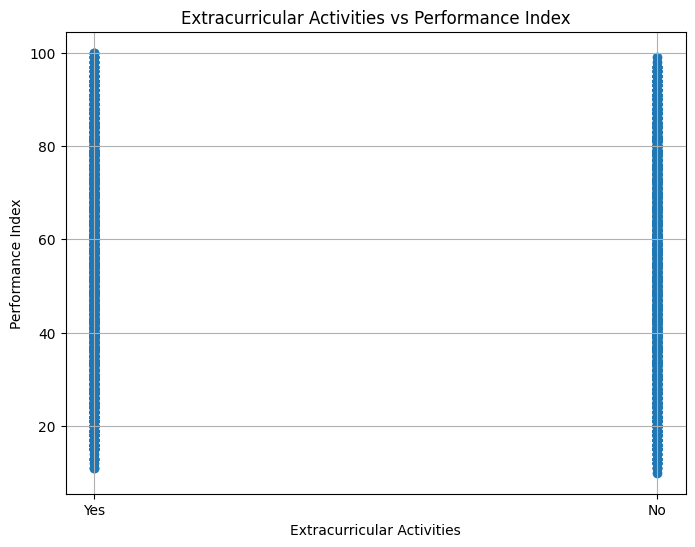

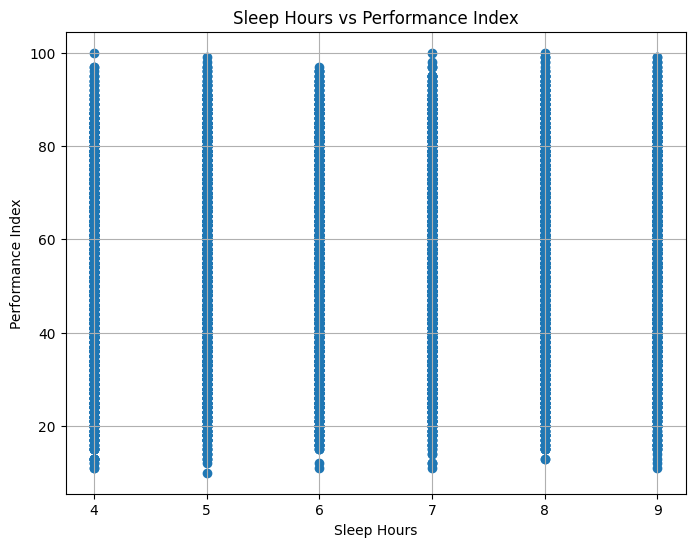

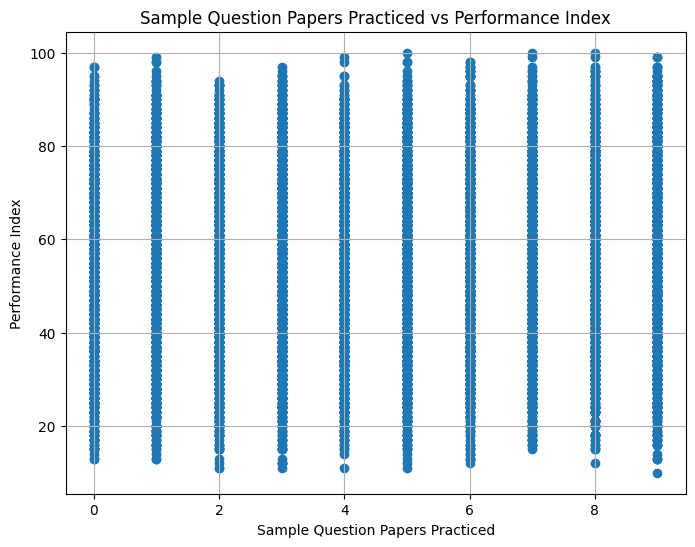

In [136]:
# Create scatter plots for each column against the Performance Index
columns_to_plot = ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']
for column in columns_to_plot:
    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
    plt.scatter(df[column], df['Performance Index'])
    plt.xlabel(column)
    plt.ylabel('Performance Index')
    plt.title(f'{column} vs Performance Index')
    plt.grid(True)
    plt.show()

# Show the plot
plt.show()

In [137]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [138]:
y = df['Performance Index']
X = df.drop(['Performance Index'], axis = 1)

In [139]:
X

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,Yes,9,1
1,4,82,No,4,2
2,8,51,Yes,7,2
3,5,52,Yes,5,2
4,7,75,No,8,5
...,...,...,...,...,...
9995,1,49,Yes,4,2
9996,7,64,Yes,8,5
9997,6,83,Yes,8,5
9998,9,97,Yes,7,0


In [140]:
y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

In [141]:
X['Extracurricular Activities'] = X['Extracurricular Activities'].replace({'Yes': 1, 'No': 0})

In [142]:
X

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,7,99,1,9,1
1,4,82,0,4,2
2,8,51,1,7,2
3,5,52,1,5,2
4,7,75,0,8,5
...,...,...,...,...,...
9995,1,49,1,4,2
9996,7,64,1,8,5
9997,6,83,1,8,5
9998,9,97,1,7,0


In [143]:
columns = X.columns

In [144]:
columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced'],
      dtype='object')

In [145]:
scaler = StandardScaler()

In [146]:
X = scaler.fit_transform(X)

In [147]:
X = pd.DataFrame(X, columns = columns)

In [148]:
X

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
0,0.775188,1.704176,1.010455,1.456205,-1.249754
1,-0.383481,0.723913,-0.989654,-1.492294,-0.900982
2,1.161410,-1.063626,1.010455,0.276805,-0.900982
3,0.002742,-1.005963,1.010455,-0.902594,-0.900982
4,0.775188,0.320275,-0.989654,0.866505,0.145333
...,...,...,...,...,...
9995,-1.542149,-1.178951,1.010455,-1.492294,-0.900982
9996,0.775188,-0.314013,1.010455,0.866505,0.145333
9997,0.388965,0.781575,1.010455,0.866505,0.145333
9998,1.547633,1.588851,1.010455,0.276805,-1.598526


In [149]:
y

0       91.0
1       65.0
2       45.0
3       36.0
4       66.0
        ... 
9995    23.0
9996    58.0
9997    74.0
9998    95.0
9999    64.0
Name: Performance Index, Length: 10000, dtype: float64

In [150]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2)

In [151]:
train_X

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
7448,-1.542149,1.415863,1.010455,-0.312895,-0.203439
1716,0.002742,0.608588,-0.989654,1.456205,-0.552210
2608,-1.542149,0.781575,-0.989654,0.276805,-0.900982
9673,1.547633,-0.717651,-0.989654,-0.312895,-0.552210
8113,1.547633,-1.294276,1.010455,1.456205,1.191649
...,...,...,...,...,...
6878,0.388965,1.185213,-0.989654,0.276805,1.540420
8311,0.388965,-0.890638,1.010455,-1.492294,-1.249754
5521,1.161410,-0.314013,1.010455,-0.312895,-0.552210
8905,-1.542149,0.377938,1.010455,0.276805,-1.249754


In [152]:
test_X

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
628,-1.155926,-0.890638,-0.989654,-0.902594,-0.552210
207,1.547633,-0.025700,-0.989654,-1.492294,-0.900982
6183,1.161410,-1.178951,1.010455,-0.902594,0.842877
773,-0.383481,1.646513,-0.989654,0.276805,-0.900982
972,-1.155926,0.781575,1.010455,-1.492294,0.145333
...,...,...,...,...,...
8069,1.161410,-1.582588,-0.989654,-1.492294,-1.598526
5986,0.388965,0.666250,-0.989654,-1.492294,0.842877
6186,0.775188,1.588851,-0.989654,1.456205,1.540420
9839,0.775188,0.723913,-0.989654,1.456205,-0.900982


In [153]:
train_y

7448    70.0
1716    65.0
2608    58.0
9673    53.0
8113    45.0
        ... 
6878    77.0
8311    39.0
5521    53.0
8905    51.0
6342    55.0
Name: Performance Index, Length: 8000, dtype: float64

In [154]:
test_y

628     26.0
207     65.0
6183    44.0
773     78.0
972     60.0
        ... 
8069    31.0
5986    69.0
6186    94.0
9839    72.0
1907    33.0
Name: Performance Index, Length: 2000, dtype: float64

In [155]:
lr = LinearRegression()

In [156]:
lr.fit(train_X, train_y)

LinearRegression()

In [157]:
predictions = lr.predict(test_X)

In [158]:
predictions.shape

(2000,)

In [159]:
train_predictions = lr.predict(train_X)

In [160]:
train_mse = mean_squared_error(train_y, train_predictions)

In [161]:
train_mse

4.144851131304256

In [162]:
test_mse = mean_squared_error(test_y, predictions)

In [163]:
test_mse

4.1789043271211055

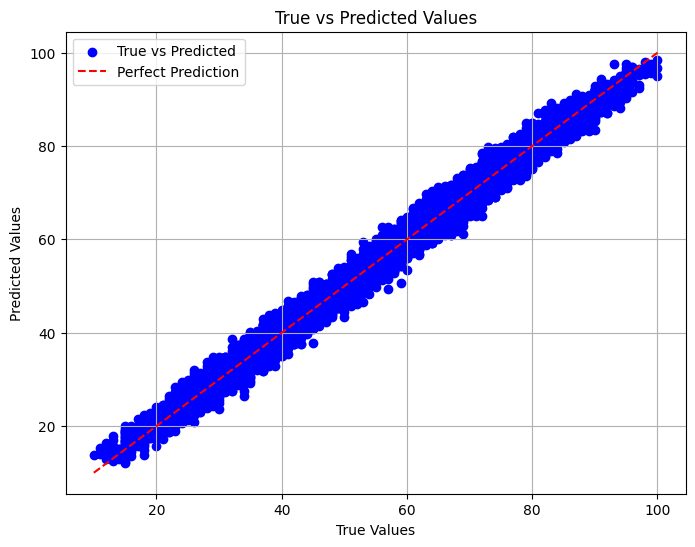

In [165]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(train_y, train_predictions, c='blue', label='True vs Predicted')
plt.plot([min(train_y), max(train_y)], [min(train_y), max(train_y)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

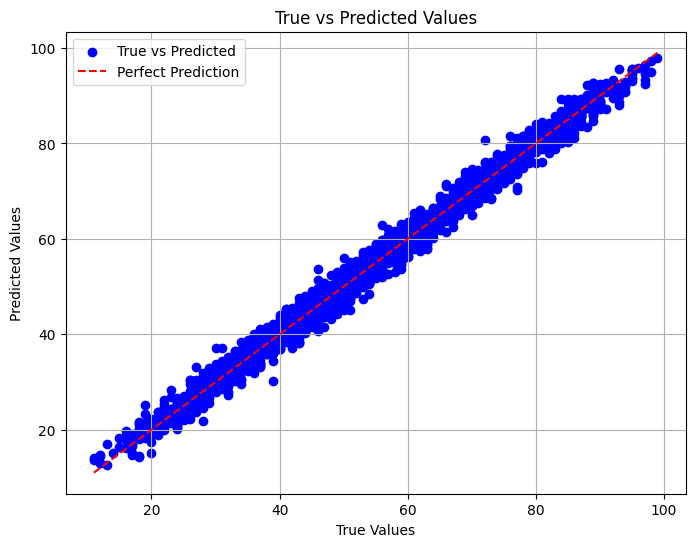

In [166]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(test_y, predictions, c='blue', label='True vs Predicted')
plt.plot([min(test_y), max(test_y)], [min(test_y), max(test_y)], linestyle='--', color='red', label='Perfect Prediction')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()

In [167]:
train_X.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
7448,-1.542149,1.415863,1.010455,-0.312895,-0.203439
1716,0.002742,0.608588,-0.989654,1.456205,-0.552210
2608,-1.542149,0.781575,-0.989654,0.276805,-0.900982
9673,1.547633,-0.717651,-0.989654,-0.312895,-0.552210
8113,1.547633,-1.294276,1.010455,1.456205,1.191649


In [168]:
first = train_X.loc[0]
first.shape

(5,)

In [173]:
inputlist = [[7, 80, 1, 4, 3]]

In [174]:
inputlist = scaler.transform(inputlist)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [175]:
inputlist

array([[ 0.77518771,  0.60858762,  1.01045465, -1.49229423, -0.55221037]])

In [176]:
inputlist.shape

(1, 5)

In [177]:
inputlist = inputlist.reshape(1, -1)

In [178]:
predict = lr.predict(inputlist)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [179]:
predict

array([70.48383904])